<a href="https://colab.research.google.com/github/elstin80/Power-BI-projects/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [2]:
import copy
import seaborn as sns
import tensorflow as tf

In [3]:
from sklearn.linear_model import LinearRegression

## Dataset:

Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

Source: Data Source :http://data.seoul.go.kr/ SOUTH KOREA PUBLIC HOLIDAYS. URL: publicholidays.go.kr

## Getting rid of data that doesnt affect the outcome much
### axis=1, means drop it from columns

In [4]:
cols = ["bike_count", "hour", "temp", "humidity", "wind", "visibility", "dew_pt_temp", "radiation", "rain", "snow", "functional"]
df=pd.read_csv("SeoulBikeData.csv",encoding='unicode_escape').drop(['Date','Holiday','Seasons'],axis=1)

In [5]:
df

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Functioning Day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Yes
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Yes
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Yes
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Yes
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Yes
...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Yes
8756,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Yes
8757,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Yes
8758,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Yes


In [6]:
df.columns=cols


In [7]:
df

,bike_count,hour,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,functional
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Yes
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Yes
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Yes
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Yes
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Yes
...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Yes
8756,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Yes
8757,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Yes
8758,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Yes


In [8]:
df['functional'].unique()

array(['Yes', 'No'], dtype=object)

In [9]:
df['functional'] = (df['functional'] == 'Yes').astype(int)

In [10]:
df.head()

,bike_count,hour,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,functional
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,1


### WE are only going to use specific hours

In [11]:
df=df[df['hour']== 12]

df.head()


,bike_count,hour,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,functional
12,449,12,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,1
36,479,12,4.3,41,1.3,1666,-7.8,1.09,0.0,0.0,1
60,333,12,5.8,85,1.7,349,3.4,0.43,0.0,0.0,1
84,393,12,-0.3,38,4.8,1823,-12.9,1.11,0.0,0.0,1
108,321,12,-2.3,25,0.0,1962,-19.7,0.00,0.0,0.0,1


In [12]:
df=df.drop(['hour'],axis=1)

df.head()

,bike_count,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,functional
12,449,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,1
36,479,4.3,41,1.3,1666,-7.8,1.09,0.0,0.0,1
60,333,5.8,85,1.7,349,3.4,0.43,0.0,0.0,1
84,393,-0.3,38,4.8,1823,-12.9,1.11,0.0,0.0,1
108,321,-2.3,25,0.0,1962,-19.7,0.00,0.0,0.0,1


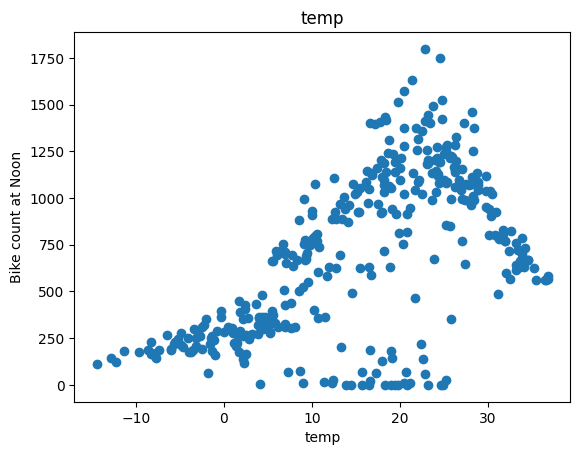

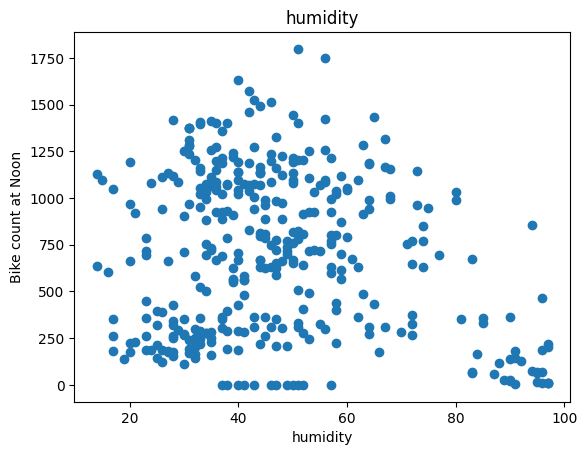

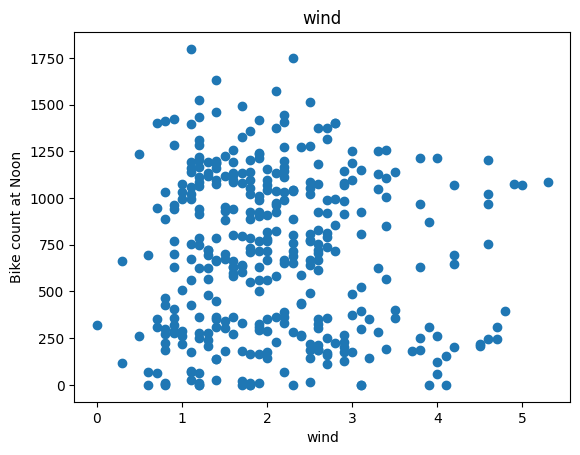

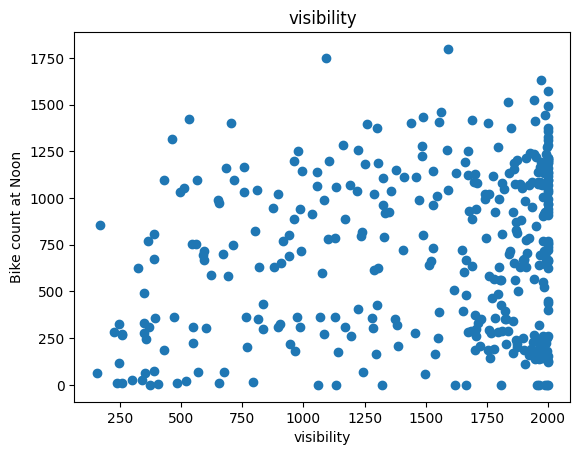

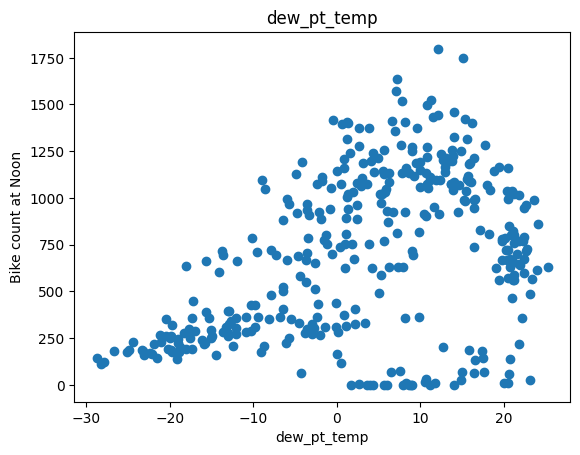

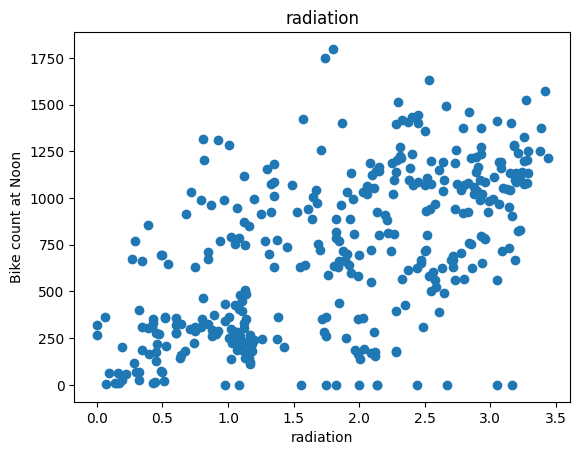

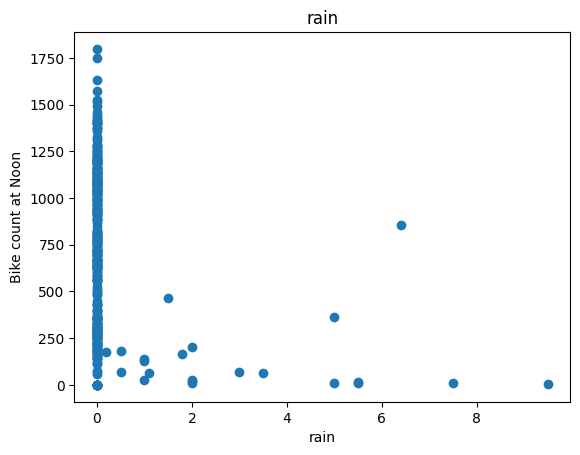

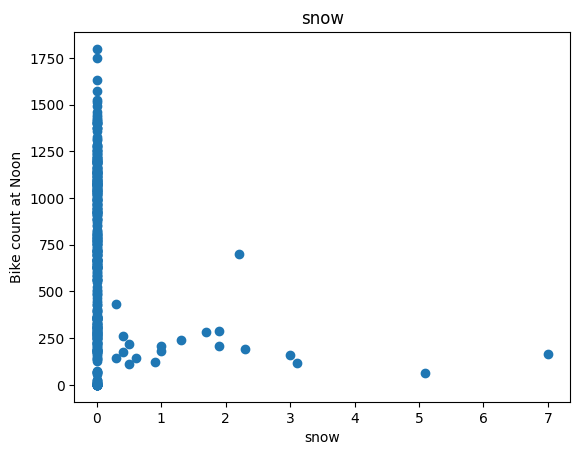

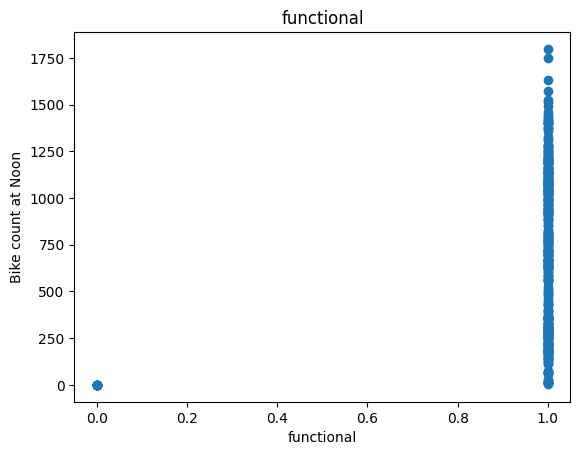

In [13]:
for label in df.columns[1:]:
  plt.scatter(df[label],df['bike_count'])
  plt.title(label)
  plt.ylabel("Bike count at Noon")
  plt.xlabel(label)
  plt.show()

## Dropping Wind,Visibility,Functional as they are of dont really matters


In [14]:
df=df.drop(['wind','visibility','functional'],axis=1)

df.head()

,bike_count,temp,humidity,dew_pt_temp,radiation,rain,snow
12,449,1.7,23,-17.2,1.11,0.0,0.0
36,479,4.3,41,-7.8,1.09,0.0,0.0
60,333,5.8,85,3.4,0.43,0.0,0.0
84,393,-0.3,38,-12.9,1.11,0.0,0.0
108,321,-2.3,25,-19.7,0.00,0.0,0.0


# TRAIN,VALID,TEST


In [15]:
train,val,test = np.split(df.sample(frac=1),[int(0.6*len(df)),int(0.8*len(df))])

## Getting X and y

In [16]:
def get_xy(dataframe,y_label,x_labels=None):
  dataframe = copy.deepcopy(dataframe)
  if x_labels is None:
    X = dataframe[[c for c in datafreme.columns if c!=y_label]].values
  else:
    if len(x_labels) == 1:
      X=dataframe[x_labels[0]].values.reshape(-1,1)
    else:
      X=dataframe[x_labels].values

  y=dataframe[y_label].values.reshape(-1,1)
  data=np.hstack((X,y))

  return data,X,y


In [17]:
_,X_train_temp,y_train_temp = get_xy(train,"bike_count",x_labels=["temp"])
_,X_val_temp,y_val_temp = get_xy(val,"bike_count",x_labels=["temp"])
_,X_test_temp,y_test_temp = get_xy(test,"bike_count",x_labels=["temp"])

# SIMPLE LINEAR REGRESSION

In [18]:
temp_reg = LinearRegression()
temp_reg.fit(X_train_temp,y_train_temp)


LinearRegression()

In [19]:
print(temp_reg.coef_,temp_reg.intercept_)

[[21.36815561]] [373.22965194]


Getting R square

In [20]:
temp_reg.score(X_test_temp,y_test_temp) #R**2 value is .28 is higher than 0,same time
                                        #Higher the number is higher the correlation between temprature & bike count

0.3240671558865912

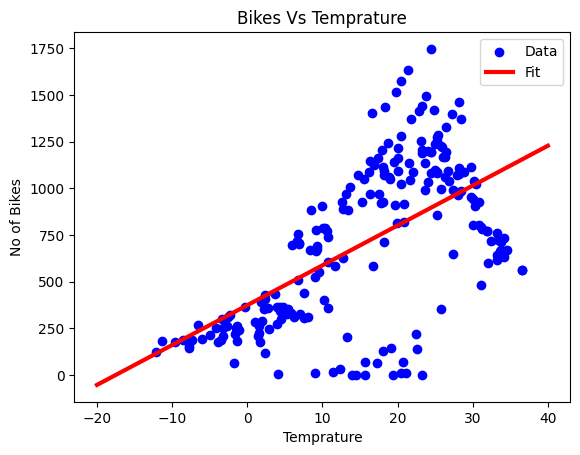

In [21]:
plt.scatter(X_train_temp,y_train_temp,label='Data',color='blue')
x = tf.linspace(-20,40,100)
plt.plot(x,temp_reg.predict(np.array(x).reshape(-1,1)),label='Fit',color='red',linewidth=3)
plt.legend()
plt.title("Bikes Vs Temprature")
plt.xlabel("Temprature")
plt.ylabel("No of Bikes")
plt.show()

### We still cannot say this is the best fit line

# MULTIPLE LINEAR REGRESSION

In [22]:
df.columns

Index(['bike_count', 'temp', 'humidity', 'dew_pt_temp', 'radiation', 'rain',
       'snow'],
      dtype='object')

### Take all the columns, except for Bike column

In [23]:
train,val,test = np.split(df.sample(frac=1),[int(0.6*len(df)),int(0.8*len(df))])
_,X_train_all,y_train_all= get_xy(train,"bike_count",x_labels=df.columns[1:])
_,X_val_all,y_val_all= get_xy(val,"bike_count",x_labels=df.columns[1:])
_,X_test_all,y_test_all= get_xy(test,"bike_count",x_labels=df.columns[1:])

In [24]:
all_reg = LinearRegression()
all_reg.fit(X_train_all,y_train_all)

LinearRegression()

In [25]:
all_reg.score(X_test_all,y_test_all)

0.40183647512414766

In [85]:
y_pred_lr=all_reg.predict(X_test_all)

# REGRESSION WITH NEURAL NETWORK

In [59]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('MSE')
  plt.legend()
  plt.grid(True)
  plt.show()

In [60]:
temp_normalizer = tf.keras.layers.Normalization(input_shape=(1,),axis=None)
temp_normalizer.adapt(X_train_temp.reshape(-1))

In [61]:
temp_nn_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(1)
])

In [62]:
temp_nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),loss='mean_squared_error')

In [65]:
history=temp_nn_model.fit(
    X_train_temp.reshape(-1),y_train_temp,
    verbose=0,
    epochs=1000,
    validation_data=(X_val_temp,y_val_temp)
)

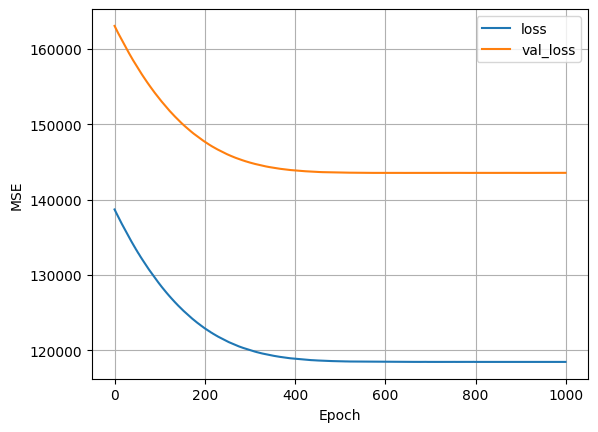

In [66]:
plot_loss(history)

4/4 [==============================] - 0s 3ms/step


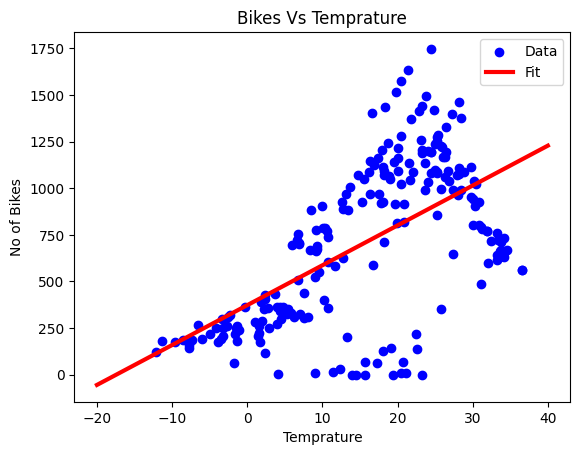

In [67]:
plt.scatter(X_train_temp,y_train_temp,label='Data',color='blue')
x = tf.linspace(-20,40,100)
plt.plot(x,temp_nn_model.predict(np.array(x).reshape(-1,1)),label='Fit',color='red',linewidth=3)
plt.legend()
plt.title("Bikes Vs Temprature")
plt.xlabel("Temprature")
plt.ylabel("No of Bikes")
plt.show()

# NEURAL NET MODEL FOR SIMPLE REGRESSION

In [69]:
temp_normalizer = tf.keras.layers.Normalization(input_shape=(1,),axis=None)
temp_normalizer.adapt(X_train_temp.reshape(-1))
nn_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(1,activation='relu')
])
nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='mean_squared_error')

In [71]:
history = nn_model.fit(
    X_train_temp,y_train_temp,
    validation_data=(X_val_temp,y_val_temp),
    verbose=0,epochs=100
)

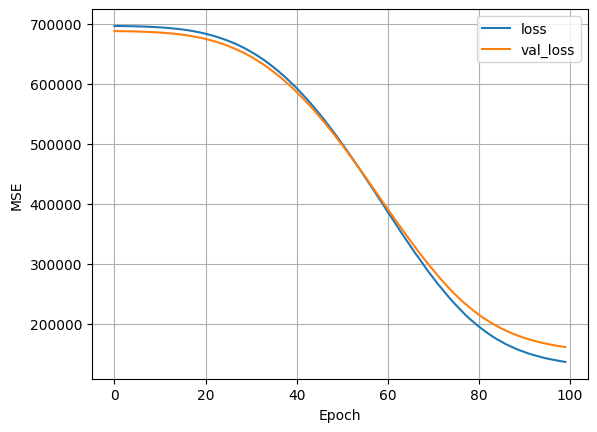

In [72]:
plot_loss(history)

4/4 [==============================] - 0s 5ms/step


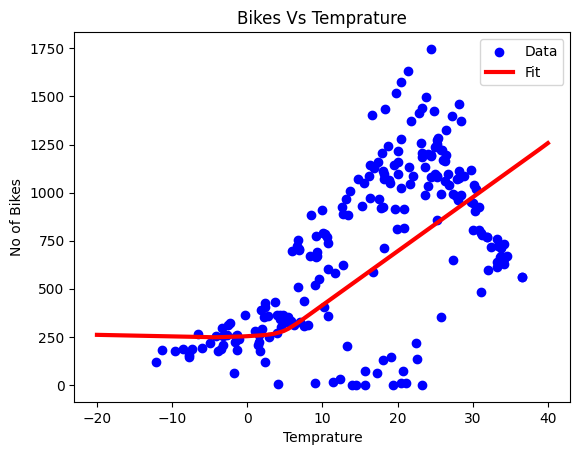

In [74]:
plt.scatter(X_train_temp,y_train_temp,label='Data',color='blue')
x = tf.linspace(-20,40,100)
plt.plot(x,nn_model.predict(np.array(x).reshape(-1,1)),label='Fit',color='red',linewidth=3)
plt.legend()
plt.title("Bikes Vs Temprature")
plt.xlabel("Temprature")
plt.ylabel("No of Bikes")
plt.show()

# NEURAL NETWORK MODEL FOR MULTIPLE REGRESSION

In [90]:
all_normalizer = tf.keras.layers.Normalization(input_shape=(6,),axis=-1)
all_normalizer.adapt(X_train_all)


In [91]:
nn_model = tf.keras.Sequential([
    all_normalizer,
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(1,activation='relu')
])
nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='mean_squared_error')

In [92]:
history = nn_model.fit(
    X_train_all,y_train_all,
    validation_data=(X_val_all,y_val_all),
    verbose=0,epochs=100
)

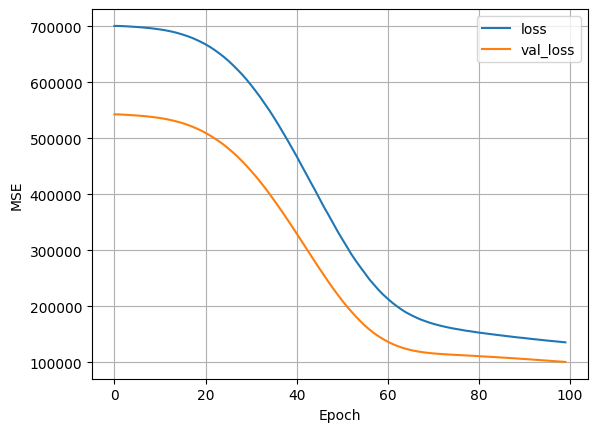

In [93]:
plot_loss(history)

## calculate the MSE for both linear reg and nn

In [94]:
y_pred_lr=all_reg.predict(X_test_all)
y_pred_nn=nn_model.predict(X_test_all)

3/3 [==============================] - 0s 3ms/step


In [95]:
def MSE(y_pred,y_real):
  return (np.square(y_pred-y_real)).mean()


In [96]:
MSE(y_pred_lr,y_test_all)

112711.02673125584

In [97]:
MSE(y_pred_nn,y_test_all)

133367.12740196366

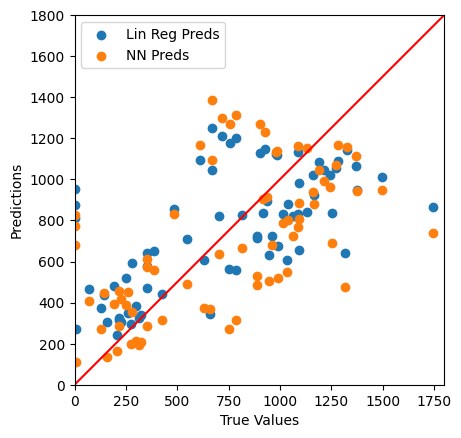

In [98]:
ax = plt.axes(aspect="equal")
plt.scatter(y_test_all, y_pred_lr, label="Lin Reg Preds")
plt.scatter(y_test_all, y_pred_nn, label="NN Preds")
plt.xlabel("True Values")
plt.ylabel("Predictions")
lims = [0, 1800]
plt.xlim(lims)
plt.ylim(lims)
plt.legend()
_ = plt.plot(lims, lims, c="red")